<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/adamczyk/Credit_score_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [142]:
df_train.head()

,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,Aaron Maashoh,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,Aaron Maashoh,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,Aaron Maashoh,-500.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,Aaron Maashoh,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,Aaron Maashoh,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [143]:
df_train.dtypes

Month                        object
Name                         object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [144]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.drop(columns = ['SSN', 'ID', 'Customer_ID'], inplace = True )
print('Train data: ', df_train.shape)
df_train.drop_duplicates(inplace=True)
print('Train data without duplicates: ', df_train.shape)
print('Test data: ',df_test.shape)

<ipython-input-144-9a9520321722>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train.csv')


Train data:  (100000, 25)
Train data without duplicates:  (100000, 25)
Test data:  (50000, 27)


In [145]:
for column in df_train.columns:
  print(column, ": ", sum(df_train[column].isnull()))

Month :  0
Name :  9985
Age :  0
Occupation :  0
Annual_Income :  0
Monthly_Inhand_Salary :  15002
Num_Bank_Accounts :  0
Num_Credit_Card :  0
Interest_Rate :  0
Num_of_Loan :  0
Type_of_Loan :  11408
Delay_from_due_date :  0
Num_of_Delayed_Payment :  7002
Changed_Credit_Limit :  0
Num_Credit_Inquiries :  1965
Credit_Mix :  0
Outstanding_Debt :  0
Credit_Utilization_Ratio :  0
Credit_History_Age :  9030
Payment_of_Min_Amount :  0
Total_EMI_per_month :  0
Amount_invested_monthly :  4479
Payment_Behaviour :  0
Monthly_Balance :  1200
Credit_Score :  0


In [146]:

categorical_to_numbers = ['Month', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
numeric_columns = ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
                   'Interest_Rate', 'Num_of_Loan',
                   'Num_of_Delayed_Payment',
                   #'Changed_Credit_Limit',
                   'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']

for column in numeric_columns:
  print(column)
  df_train[column] = df_train[column].astype(str)
  df_train[column] = df_train[column].str.replace('_', '')
  #df_train[column] = df_train[column].str.replace('', np.nan)
  df_train[column] = df_train[column].astype(float)
  df_train[column] = df_train[column].fillna(df_train[column].mean())

#df_train[numeric_columns] = df_train[numeric_columns].apply(pd.to_numeric)

Age
Annual_Income
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Num_of_Loan
Num_of_Delayed_Payment
Outstanding_Debt
Amount_invested_monthly
Monthly_Balance


In [147]:
def convert_to_months(value):
    parts = str(value).split(' ')
    years = float(parts[0])
    months = float(parts[3]) if len(parts) > 3 else 0
    return 12*years+months
df_train['Credit_History_Age'] = df_train['Credit_History_Age'].apply(convert_to_months)
print(df_train['Credit_History_Age'].head())

0    265.0
1      NaN
2    267.0
3    268.0
4    269.0
Name: Credit_History_Age, dtype: float64


In [ ]:
sns.histplot(data = df_train, x = 'Age')

In [ ]:
sns.histplot(data = df_train, x = 'Age')

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7ce5eb228ee0> (for post_execute):


KeyboardInterrupt: 

In [148]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Name                      90015 non-null   object 
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  float64
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    100000 non-null  float64
 13  Changed_Credit_Limit      100000 non-null  ob

In [149]:
for column in df_train.columns:
  print(column, ": ", sum(df_train[column].isnull()))

Month :  0
Name :  9985
Age :  0
Occupation :  0
Annual_Income :  0
Monthly_Inhand_Salary :  15002
Num_Bank_Accounts :  0
Num_Credit_Card :  0
Interest_Rate :  0
Num_of_Loan :  0
Type_of_Loan :  11408
Delay_from_due_date :  0
Num_of_Delayed_Payment :  0
Changed_Credit_Limit :  0
Num_Credit_Inquiries :  1965
Credit_Mix :  0
Outstanding_Debt :  0
Credit_Utilization_Ratio :  0
Credit_History_Age :  9030
Payment_of_Min_Amount :  0
Total_EMI_per_month :  0
Amount_invested_monthly :  0
Payment_Behaviour :  0
Monthly_Balance :  0
Credit_Score :  0


<Axes: xlabel='Credit_Score', ylabel='Count'>

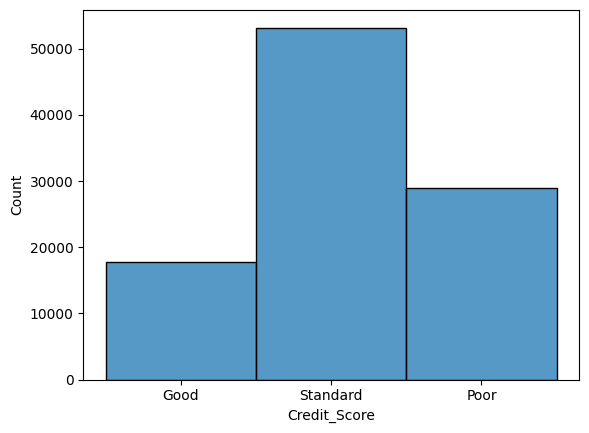

In [150]:
sns.histplot(df_train, x='Credit_Score')